### Background
    - goal:
        - understand what factors actually impact the covid cases most profoundly 
    - question:
        - does the number of cases correlates with 
            - mobility, 
            - socioeconomic status of the local communities, or 
            - the underylying health conditions
    - data: 
        - cases: # of confirmed covid cases by county in the US 
        - mobility: google mobility datasets: mobility index of each county by locations, retail, parks, grocery, workplace 
        - health: local health status: demographic information, english proficiency, underaged birth etc.
    
        
  

### Data cleaning and formatting
    -  winsorize, outlier, missing value, transform
    -  inspect head() and info()
    -  convert data types
        -  one-hot encoding
    -  convert "Not available" to na
        -  missing data 
            -removed roles with > 50 na
            -impute the others (Scikit-Learn Imputer object)
        -  outlier 
            - floor/ceiling the outliers, but I kept it just to see the baseline
    -  join the datasets
        -  inner join 

### Exploratory data analysis
    -  looking for relationships
        -predictor vs. independent variables, and i.v. vs. i.v.
    -  single variable plot
    -  density plot of response variable by difference variables, looking for difference 
    -  two-variable plots
    -  paris plots
    -  correlation (pearson correlation coefficient/variance inflation factor)
        -seaborn heatmap 

### Feature engineering and selection
    - include all relevant information 
    - encode categorical variables, transofrmations include log, sqrt etc help learn non-linear relationships
    feature selction:
    - multicoliearity 
        -drop one of a pair of features if the correlation coefficient between them is greater than 0.6
    - feature scaling (Scikit-Learn MinMaxScaler)
        -each feature min0 max1

### Compare several machine learning models on a performance metric
    - establish baseline performance
        -training set split
        -implement simple models and use a single matrix to evaluate 
            -mean, median, simple linear regreassion
    - linear regression 
    - decision tree
    - KNN
    - random forest
    - suport vector machines
    - Neural nets
    - model comparison based on the loss funtion, MAE mean absolute error
    - RF>>GB
    
### Perform hyperparameter tuning on the best model
    - build a hyperparameter grid
    - test with k-fold CV 
    - test a number of combinations of hyperparameters
    - overfitting vs. underfitting 
    

### Evaluate the best model on the testing set
    - evaluate residule plot, on the tails it tend to underfit
    - ROC, MSE, confusion matrix, accuracy, F1 score
    
### Interpret the model results
    - feature importance
    


Boosting is an ensemble method, where it trains the weak learners in sequence, with each learner “concentrating” on the mistakes made by the previous ones.

The Gradient Boosting uses Gradient Descent to minimize the cost function by sequentially training learners on the residuals of previous ones. 

Ensemble average out biases, reduce variance, and are less likely to overfit.

The Scikit-Learn implementation of Gradient Boosting is generally regarded as less efficient than other libraries such as XGBoost , but it will work well enough for our small dataset and is quite accurate.

Bagging: bootstrap aggregating

reduce dimensionalities:
    - drop correltaed terms
    - lasso regrulirization 
    - pca, lda
    - combine features
small training set: high bias, low variance model
AUROC is robust to class imbalance, unlike raw accuracy.

### load data

In [1]:
import pandas as pd

In [6]:
pwd

'C:\\Users\\diane.dou\\kaggle'

In [11]:
mobility = pd.read_csv('us-mobility.csv')
health = pd.read_csv("health-ranking.csv")
cases = pd.read_csv('cases.csv')

In [15]:
print(mobility.shape, health.shape, cases.shape)

(155060, 9) (3193, 507) (313110, 9)


### format and clean data

In [18]:
mobility.head()

,state,county,date,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Total,Total,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,Total,Total,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,Total,Total,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,Total,Total,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,Total,Total,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [92]:
mobility = mobility[mobility.county != 'Total']
print(mobility.shape)

(28654, 9)


In [82]:
display_missing(mobility)

,Total,Percent
parks,114449,0.738095
transit_stations,95514,0.615981
residential,83002,0.535290
grocery_and_pharmacy,26038,0.167922
retail,21667,0.139733
workplaces,9029,0.058229
date,0,0.000000
county,0,0.000000
state,0,0.000000


In [84]:
mobility = mobility.dropna()

In [86]:
mobility.shape

(31618, 9)

In [89]:
display_missing(mobility)

,Total,Percent
residential,0,0.0
workplaces,0,0.0
transit_stations,0,0.0
parks,0,0.0
grocery_and_pharmacy,0,0.0
retail,0,0.0
date,0,0.0
county,0,0.0
state,0,0.0


In [27]:
health.head()

,fips,state,county,num_deaths,years_of_potential_life_lost_rate,95percent_ci_low,95percent_ci_high,quartile,ypll_rate_aian,ypll_rate_aian_95percent_ci_low,...,percent_hispanic,num_non_hispanic_white,percent_non_hispanic_white,num_not_proficient_in_english,percent_not_proficient_in_english,95percent_ci_low_39,95percent_ci_high_39,percent_female,num_rural,percent_rural
0,1000,Alabama,NaN,81791.0,9942.794666,9840.535949,10045.053384,NaN,NaN,NaN,...,4.443264,3197324,65.413428,48517,1.061048,1.006759,1.115337,51.633032,1957932.0,40.963183
1,1001,Alabama,Autauga,791.0,8128.591190,7283.340731,8973.841649,1.0,NaN,NaN,...,2.965774,41316,74.308016,426,0.820225,0.347891,1.292558,51.448715,22921.0,42.002162
2,1003,Alabama,Baldwin,2967.0,7354.122530,6918.554269,7789.690790,1.0,NaN,NaN,...,4.646779,181201,83.111337,1068,0.543517,0.347271,0.739763,51.538377,77060.0,42.279099
3,1005,Alabama,Barbour,472.0,10253.573403,8782.217281,11724.929524,2.0,NaN,NaN,...,4.276355,11356,45.641252,398,1.631683,0.824903,2.438462,47.216752,18613.0,67.789635
4,1007,Alabama,Bibb,471.0,11977.539484,10344.064842,13611.014126,3.0,NaN,NaN,...,2.625000,16708,74.589286,57,0.268210,0.000000,0.807504,46.781250,15663.0,68.352607


In [29]:
def display_missing(df, head=True):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [36]:
health_missing  = display_missing(health)

,Total,Percent
petitioned_cases,3193,1.000000
non_petitioned_cases,3193,1.000000
infant_mortality_rate_aian_95percent_ci_low,3186,0.997808
infant_mortality_rate_aian_95percent_ci_high,3186,0.997808
infant_mortality_rate_aian,3186,0.997808
...,...,...
95percent_ci_high_29,0,0.000000
average_traffic_volume_per_meter_of_major_roadways,0,0.000000
num_homeowners,0,0.000000
percent_homeowners,0,0.000000


In [37]:
health_missing  = display_missing(health)

In [59]:
h_drop_list = list(health_missing[health_missing.Percent > .2].index.values)

In [66]:
health = health.drop(columns = h_drop_list)

In [69]:
cases.head()

,county_fips,county_name,state_name,state_fips,date,confirmed,lat,long,geometry
0,0,Statewide Unallocated,AL,1,2020-01-22,0,NaN,NaN,NaN
1,0,Statewide Unallocated,AL,1,2020-01-23,0,NaN,NaN,NaN
2,0,Statewide Unallocated,AL,1,2020-01-24,0,NaN,NaN,NaN
3,0,Statewide Unallocated,AL,1,2020-01-25,0,NaN,NaN,NaN
4,0,Statewide Unallocated,AL,1,2020-01-26,0,NaN,NaN,NaN


In [70]:
cases_drop = ['lat', 'long', 'geometry']

In [71]:
cases = cases.drop(columns = cases_drop)

In [72]:
cases.shape

(313110, 6)

In [75]:
display_missing(cases)

,Total,Percent
confirmed,0,0.0
date,0,0.0
state_fips,0,0.0
state_name,0,0.0
county_name,0,0.0
county_fips,0,0.0


In [94]:
cases = cases[cases.county_fips != 0]

In [90]:
### merge the datasets

In [93]:
mobility.head()

,state,county,date,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
171,Alabama,Baldwin County,2020-02-15,17.0,12.0,55.0,8.0,6.0,-2.0
172,Alabama,Baldwin County,2020-02-16,8.0,8.0,-12.0,7.0,-3.0,2.0
173,Alabama,Baldwin County,2020-02-17,9.0,9.0,31.0,7.0,-3.0,1.0
174,Alabama,Baldwin County,2020-02-18,7.0,8.0,21.0,0.0,2.0,0.0
175,Alabama,Baldwin County,2020-02-19,12.0,9.0,41.0,8.0,3.0,-1.0


In [95]:
cases.head()

,county_fips,county_name,state_name,state_fips,date,confirmed
98,1001,Autauga County,AL,1,2020-01-22,0
99,1001,Autauga County,AL,1,2020-01-23,0
100,1001,Autauga County,AL,1,2020-01-24,0
101,1001,Autauga County,AL,1,2020-01-25,0
102,1001,Autauga County,AL,1,2020-01-26,0


In [113]:
cases.shape

(308210, 6)

In [114]:
cases[cases.confirmed == 0].shape

(211480, 6)

In [99]:
health.head()

,fips,state,county,num_deaths,years_of_potential_life_lost_rate,95percent_ci_low,95percent_ci_high,quartile,percent_fair_or_poor_health,95percent_ci_low_2,...,percent_hispanic,num_non_hispanic_white,percent_non_hispanic_white,num_not_proficient_in_english,percent_not_proficient_in_english,95percent_ci_low_39,95percent_ci_high_39,percent_female,num_rural,percent_rural
0,1000,Alabama,NaN,81791.0,9942.794666,9840.535949,10045.053384,NaN,22.028703,20.743429,...,4.443264,3197324,65.413428,48517,1.061048,1.006759,1.115337,51.633032,1957932.0,40.963183
1,1001,Alabama,Autauga,791.0,8128.591190,7283.340731,8973.841649,1.0,20.882987,20.252255,...,2.965774,41316,74.308016,426,0.820225,0.347891,1.292558,51.448715,22921.0,42.002162
2,1003,Alabama,Baldwin,2967.0,7354.122530,6918.554269,7789.690790,1.0,17.509134,17.024152,...,4.646779,181201,83.111337,1068,0.543517,0.347271,0.739763,51.538377,77060.0,42.279099
3,1005,Alabama,Barbour,472.0,10253.573403,8782.217281,11724.929524,2.0,29.591802,28.798922,...,4.276355,11356,45.641252,398,1.631683,0.824903,2.438462,47.216752,18613.0,67.789635
4,1007,Alabama,Bibb,471.0,11977.539484,10344.064842,13611.014126,3.0,19.439724,18.762752,...,2.625000,16708,74.589286,57,0.268210,0.000000,0.807504,46.781250,15663.0,68.352607


In [115]:
hc = pd.merge(health, cases, how = 'inner', left_on= 'fips', right_on = 'county_fips')

In [116]:
hc.head()

,fips,state,county,num_deaths,years_of_potential_life_lost_rate,95percent_ci_low,95percent_ci_high,quartile,percent_fair_or_poor_health,95percent_ci_low_2,...,95percent_ci_high_39,percent_female,num_rural,percent_rural,county_fips,county_name,state_name,state_fips,date,confirmed
0,1001,Alabama,Autauga,791.0,8128.59119,7283.340731,8973.841649,1.0,20.882987,20.252255,...,1.292558,51.448715,22921.0,42.002162,1001,Autauga County,AL,1,2020-01-22,0
1,1001,Alabama,Autauga,791.0,8128.59119,7283.340731,8973.841649,1.0,20.882987,20.252255,...,1.292558,51.448715,22921.0,42.002162,1001,Autauga County,AL,1,2020-01-23,0
2,1001,Alabama,Autauga,791.0,8128.59119,7283.340731,8973.841649,1.0,20.882987,20.252255,...,1.292558,51.448715,22921.0,42.002162,1001,Autauga County,AL,1,2020-01-24,0
3,1001,Alabama,Autauga,791.0,8128.59119,7283.340731,8973.841649,1.0,20.882987,20.252255,...,1.292558,51.448715,22921.0,42.002162,1001,Autauga County,AL,1,2020-01-25,0
4,1001,Alabama,Autauga,791.0,8128.59119,7283.340731,8973.841649,1.0,20.882987,20.252255,...,1.292558,51.448715,22921.0,42.002162,1001,Autauga County,AL,1,2020-01-26,0


In [121]:
hc.shape

(308014, 228)

In [126]:
hcm = pd.merge(hc, mobility, how = 'inner', left_on = ['county_name', 'date', 'state'], right_on = ['county', 'date', 'state'])

In [128]:
hcm.head()

,fips,state,county_x,num_deaths,years_of_potential_life_lost_rate,95percent_ci_low,95percent_ci_high,quartile,percent_fair_or_poor_health,95percent_ci_low_2,...,state_fips,date,confirmed,county_y,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,1003,Alabama,Baldwin,2967.0,7354.12253,6918.554269,7789.69079,1.0,17.509134,17.024152,...,1,2020-02-15,0,Baldwin County,17.0,12.0,55.0,8.0,6.0,-2.0
1,1003,Alabama,Baldwin,2967.0,7354.12253,6918.554269,7789.69079,1.0,17.509134,17.024152,...,1,2020-02-16,0,Baldwin County,8.0,8.0,-12.0,7.0,-3.0,2.0
2,1003,Alabama,Baldwin,2967.0,7354.12253,6918.554269,7789.69079,1.0,17.509134,17.024152,...,1,2020-02-17,0,Baldwin County,9.0,9.0,31.0,7.0,-3.0,1.0
3,1003,Alabama,Baldwin,2967.0,7354.12253,6918.554269,7789.69079,1.0,17.509134,17.024152,...,1,2020-02-18,0,Baldwin County,7.0,8.0,21.0,0.0,2.0,0.0
4,1003,Alabama,Baldwin,2967.0,7354.12253,6918.554269,7789.69079,1.0,17.509134,17.024152,...,1,2020-02-19,0,Baldwin County,12.0,9.0,41.0,8.0,3.0,-1.0


In [127]:
hcm.shape

(27832, 235)

In [131]:
display_missing(hcm)

,Total,Percent
residential,0,0.0
quartile_18,0,0.0
95percent_ci_low_13,0,0.0
percent_some_college,0,0.0
population,0,0.0
...,...,...
95percent_ci_low_24,0,0.0
percent_frequent_physical_distress,0,0.0
95percent_ci_high_21,0,0.0
95percent_ci_low_21,0,0.0


In [130]:
hcm.fillna(0, inplace=True)

In [142]:
hcm.columns

Index(['fips', 'state', 'county_x', 'num_deaths',
       'years_of_potential_life_lost_rate', '95percent_ci_low',
       '95percent_ci_high', 'quartile', 'percent_fair_or_poor_health',
       '95percent_ci_low_2',
       ...
       'percent_rural', 'county_fips', 'date', 'confirmed', 'retail',
       'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces',
       'residential'],
      dtype='object', length=231)

In [140]:
hcm = hcm.drop(columns = ['county_y', 'state_name', 'state_fips', 'county_name'])

In [150]:
hcm = hcm.drop(columns = ['county_fips'])

In [151]:
print(hcm.columns)

Index(['state', 'county_x', 'num_deaths', 'years_of_potential_life_lost_rate',
       '95percent_ci_low', '95percent_ci_high', 'quartile',
       'percent_fair_or_poor_health', '95percent_ci_low_2',
       '95percent_ci_high_2',
       ...
       'num_rural', 'percent_rural', 'date', 'confirmed', 'retail',
       'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces',
       'residential'],
      dtype='object', length=229)


In [152]:
hcm.corr()

,num_deaths,years_of_potential_life_lost_rate,95percent_ci_low,95percent_ci_high,quartile,percent_fair_or_poor_health,95percent_ci_low_2,95percent_ci_high_2,quartile_2,average_number_of_physically_unhealthy_days,...,percent_female,num_rural,percent_rural,confirmed,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
num_deaths,1.000000,-0.068921,-0.014438,-0.116748,-0.038771,0.060318,0.072182,0.048695,0.103315,-0.050380,...,0.158081,0.020166,-0.421447,0.209751,-0.044840,-0.056252,-0.076336,-0.123110,-0.048181,0.059739
years_of_potential_life_lost_rate,-0.068921,1.000000,0.995573,0.996517,0.619771,0.573263,0.571164,0.574729,0.272949,0.715041,...,0.186197,0.068755,0.314306,-0.098302,0.107178,0.140621,-0.029719,0.180999,0.103149,-0.136495
95percent_ci_low,-0.014438,0.995573,1.000000,0.984268,0.614565,0.577848,0.577145,0.577939,0.278575,0.709318,...,0.217495,0.075796,0.249543,-0.085872,0.101961,0.134872,-0.025235,0.168938,0.097195,-0.129811
95percent_ci_high,-0.116748,0.996517,0.984268,1.000000,0.619798,0.564947,0.561626,0.567622,0.265935,0.714820,...,0.157050,0.061999,0.369435,-0.108602,0.111013,0.144679,-0.033478,0.190358,0.107667,-0.141414
quartile,-0.038771,0.619771,0.614565,0.619798,1.000000,0.247666,0.245920,0.249140,0.537953,0.372797,...,0.031008,0.067854,0.203837,-0.050650,0.051651,0.067230,0.024517,0.088299,0.057156,-0.075038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
grocery_and_pharmacy,-0.056252,0.140621,0.134872,0.144679,0.067230,0.068564,0.067574,0.069577,0.010465,0.088821,...,-0.035927,-0.025029,0.066631,-0.181359,0.699146,1.000000,0.297919,0.625345,0.630083,-0.625608
parks,-0.076336,-0.029719,-0.025235,-0.033478,0.024517,-0.158356,-0.159178,-0.157615,-0.049256,-0.080657,...,0.025544,0.037558,-0.022854,-0.074652,0.291787,0.297919,1.000000,0.308351,0.206512,-0.250891
transit_stations,-0.123110,0.180999,0.168938,0.190358,0.088299,0.120335,0.116829,0.123684,0.036258,0.153206,...,-0.028821,0.061182,0.171197,-0.270880,0.854504,0.625345,0.308351,1.000000,0.826798,-0.836286
workplaces,-0.048181,0.103149,0.097195,0.107667,0.057156,0.067710,0.066123,0.069256,0.032092,0.081833,...,-0.026475,0.024228,0.083755,-0.255773,0.908596,0.630083,0.206512,0.826798,1.000000,-0.975148


(array([  0.5,  11.5,  22.5,  33.5,  44.5,  55.5,  66.5,  77.5,  88.5,
         99.5, 110.5, 121.5, 132.5, 143.5, 154.5, 165.5, 176.5, 187.5,
        198.5, 209.5, 220.5]), <a list of 21 Text xticklabel objects>)

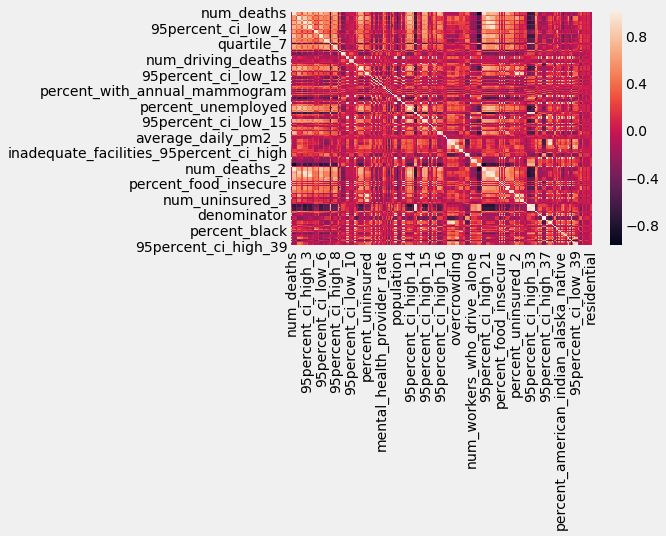

In [256]:
import seaborn as sns
sns.heatmap(hcm.corr())
plt.yticks(rotation= 0)
plt.xticks(rotation=90)

In [153]:
import matplotlib.pyplot as plt

In [161]:
hcm_nonzero = hcm[hcm.confirmed >= 1]

(0, 31291)

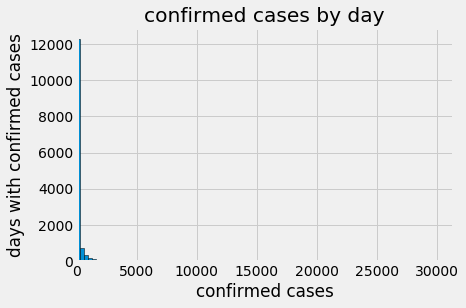

In [171]:
# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(hcm_nonzero['confirmed'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('confirmed cases'); plt.ylabel('days with confirmed cases'); 
plt.title('confirmed cases by day');
plt.xlim(0, max(hcm.confirmed))

In [173]:
hcm.shape

(27832, 229)

In [175]:
target = hcm.confirmed

In [176]:
features = hcm.drop(columns = 'confirmed')

In [177]:
from sklearn.model_selection import train_test_split

In [220]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42)

In [188]:
from sklearn.preprocessing import MinMaxScaler

In [189]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [210]:
X_train.head()

,state,county_x,num_deaths,years_of_potential_life_lost_rate,95percent_ci_low,95percent_ci_high,quartile,percent_fair_or_poor_health,95percent_ci_low_2,95percent_ci_high_2,...,percent_female,num_rural,percent_rural,date,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
20453,36,9,16701.0,7960.352294,7774.182458,8146.522131,3.0,12.731568,12.387283,13.105515,...,51.668511,30416.0,2.486292,21,6.0,5.0,39.0,11.0,3.0,-1.0
11904,19,290,12483.0,4384.115744,4270.304384,4497.927104,1.0,10.844167,10.575017,11.138718,...,51.044705,45509.0,3.027706,38,-52.0,-22.0,-10.0,-72.0,-65.0,30.0
10810,16,455,1737.0,9721.446992,9072.482479,10370.411506,2.0,20.855002,20.292381,21.387756,...,50.775979,23075.0,20.628464,55,-53.0,-5.0,5.0,-42.0,-63.0,23.0
25691,44,87,3655.0,6397.317138,6081.423613,6713.210663,1.0,12.985134,12.654653,13.320773,...,51.789956,18749.0,5.928800,56,-38.0,-16.0,34.0,-37.0,-33.0,13.0
7376,8,176,6858.0,5201.973271,5031.544216,5372.402326,1.0,16.439486,16.108198,16.789394,...,51.175331,3910.0,0.485521,22,4.0,2.0,87.0,7.0,0.0,0.0


In [196]:
from sklearn import preprocessing

In [235]:
le = preprocessing.LabelEncoder()
le = le.fit(X_train.state)
X_train_coded_state = le.transform(X_train.state)
#label_encoder = LabelEncoder()
#label_encoder = label_encoder.fit(Y)
#label_encoded_y = label_encoder.transform(Y)

In [236]:
le = preprocessing.LabelEncoder()
le = le.fit(X_train.date)
X_train_coded_date = le.transform(X_train.date)

In [237]:
le = preprocessing.LabelEncoder()
le = le.fit(X_train.county_x)
X_train_coded_county_x = le.transform(X_train.county_x)

In [240]:
X_train.state = X_train_coded_state
X_train.date = X_train_coded_date
X_train.county_x = X_train_coded_county_x

In [241]:
X_train = X_train.select_dtypes(exclude=['object'])

In [214]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19482 entries, 20453 to 23654
Columns: 223 entries, state to residential
dtypes: float64(207), int32(3), int64(13)
memory usage: 33.1 MB
None


In [222]:
le = le.fit(X_test.state)
X_test_coded_state = le.transform(X_test.state)

In [223]:
le = le.fit(X_test.date)
X_test_coded_date = le.transform(X_test.date)

In [224]:
le = le.fit(X_test.county_x)
X_test_coded_county_x = le.transform(X_test.county_x)

In [225]:
X_test.state = X_test_coded_state
X_test.date = X_test_coded_date
X_test.county_x = X_test_coded_county_x

C:\Users\diane.dou\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [226]:

X_test = X_test.select_dtypes(exclude=['object'])

In [227]:
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8350 entries, 25751 to 21637
Columns: 223 entries, state to residential
dtypes: float64(207), int32(3), int64(13)
memory usage: 14.2 MB
None


In [193]:
from sklearn.ensemble import GradientBoostingRegressor

In [194]:
# Create the model
gradient_boosted = GradientBoostingRegressor()

In [215]:
# Fit the model on the training data
gradient_boosted.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [228]:
# Make predictions on the test data
predictions = gradient_boosted.predict(X_test)

In [230]:
import numpy as np

In [231]:
# Evaluate the model
mae = np.mean(abs(predictions - y_test))

In [232]:
print('Gradient Boosted Performance on the test set: MAE = %0.4f' % mae)

Gradient Boosted Performance on the test set: MAE = 70.0591


In [238]:
### random forest

In [233]:
from sklearn.ensemble import RandomForestRegressor

In [242]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [243]:
mae = np.mean(abs(y_pred - y_test))

In [244]:
print('Gradient Boosted Performance on the test set: MAE = %0.4f' % mae)

Gradient Boosted Performance on the test set: MAE = 37.5925


In [245]:
regressor = RandomForestRegressor(n_estimators=50, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [246]:
mae = np.mean(abs(y_pred - y_test))
print('Gradient Boosted Performance on the test set: MAE = %0.4f' % mae)

Gradient Boosted Performance on the test set: MAE = 35.0918


In [247]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0, max_depth= 20)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [248]:
mae = np.mean(abs(y_pred - y_test))
print('Gradient Boosted Performance on the test set: MAE = %0.4f' % mae)

Gradient Boosted Performance on the test set: MAE = 37.5378


In [254]:
regressor = RandomForestRegressor(n_estimators=20, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [255]:
mae = np.mean(abs(y_pred - y_test))
print('Gradient Boosted Performance on the test set: MAE = %0.4f' % mae)

Gradient Boosted Performance on the test set: MAE = 34.8279


In [249]:
# model is the trained model
importances = regressor.feature_importances_

In [251]:
# train_features is the dataframe of training features
feature_list = list(X_train.columns)

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': feature_list, 
                                'importance': importances})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', 
                                              ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,average_traffic_volume_per_meter_of_major_road...,0.271030
1,date,0.170980
2,residential,0.099025
3,retail,0.060099
4,workplaces,0.050670
5,severe_housing_cost_burden_95percent_ci_low,0.044496
6,transit_stations,0.033127
7,grocery_and_pharmacy,0.022719
8,num_motor_vehicle_deaths,0.021480
9,num_unemployed,0.019343
